In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols, glm
from statsmodels.api import families
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [36]:
df = pd.read_csv("../data/curated/domain_final.csv")
df['suburb_population'] = df['suburb_population'].str.replace(",", "")
df['suburb_sold'] = df['suburb_sold'].str.replace("-", "0")
df['suburb_avg_day'] = df['suburb_avg_day'].str.replace("-", "0")
df[['suburb_population','suburb_avg_day','suburb_sold']]\
= df[['suburb_population','suburb_avg_day','suburb_sold']].apply(pd.to_numeric)

In [42]:
df_postcode = df\
                .groupby('postcode') \
                .agg(
                    {
                        'cost':'mean',
                        'Median_rent_weekly':'mean',
                        'school_distance':'mean',
                        'dist_nearest_busstop':'mean',
                        'dist_nearest_trainstation':'mean',
                        'dist_nearest_primary_school':'mean',
                        'dist_nearest_secondary_school':'mean',
                        'Beds':'mean',
                        'Bath':'mean',
                        'Parking':'mean',
                        'avg_income':'mean',
                        'Tot_P_P':'mean',
                        'Median_age_persons': 'mean',
                        'suburb_sold': 'mean',
                        'suburb_avg_day': 'mean',
                        'suburb_population': 'mean',
                        'suburb_owner': 'mean',
                        'suburb_renter':'mean',
                        'suburb_family':'mean',
                        'suburb_single':'mean',
                    }
                ) 
df_postcode.head()

,cost,Median_rent_weekly,school_distance,dist_nearest_busstop,dist_nearest_trainstation,dist_nearest_primary_school,dist_nearest_secondary_school,Beds,Bath,Parking,avg_income,Tot_P_P,Median_age_persons,suburb_sold,suburb_avg_day,suburb_population,suburb_owner,suburb_renter,suburb_family,suburb_single
postcode,,,,,,,,,,,,,,,,,,,,
3000,460.439216,375.0,1.507843,339.496471,727.642353,695.571373,568.037647,1.330709,1.066929,1.000000,2035.430097,9848.0,30.0,443.737255,123.211765,47279.0,30.0,70.0,24.0,76.0
3002,438.421053,480.0,0.884211,445.300000,819.889474,1176.052632,1192.636842,1.263158,1.000000,1.000000,2989.877299,4896.0,42.0,51.789474,48.315789,4963.0,45.0,55.0,36.0,64.0
3003,480.394737,0.0,1.281579,173.639474,705.686842,728.002632,618.268421,1.500000,1.157895,1.000000,NaN,0.0,0.0,34.605263,109.473684,5498.0,36.0,64.0,27.0,73.0
3004,456.125000,457.0,1.037500,634.430000,1505.120000,628.390000,517.952500,1.325000,1.050000,1.000000,2860.850482,6423.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,482.083333,0.0,0.944792,458.680208,1521.578125,1300.072917,982.842708,1.500000,1.187500,1.021739,NaN,0.0,70.0,267.291667,100.385417,18706.0,35.0,65.0,31.0,69.0


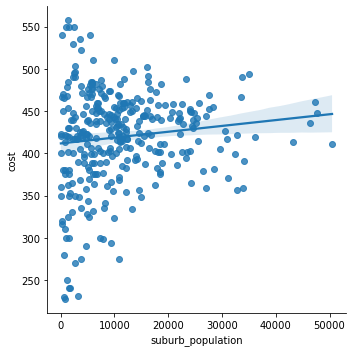

In [43]:
sns.lmplot(x="suburb_population", y="cost", data=df_postcode)

Text(0.5, 1.0, 'Pearson Correlation Metric')

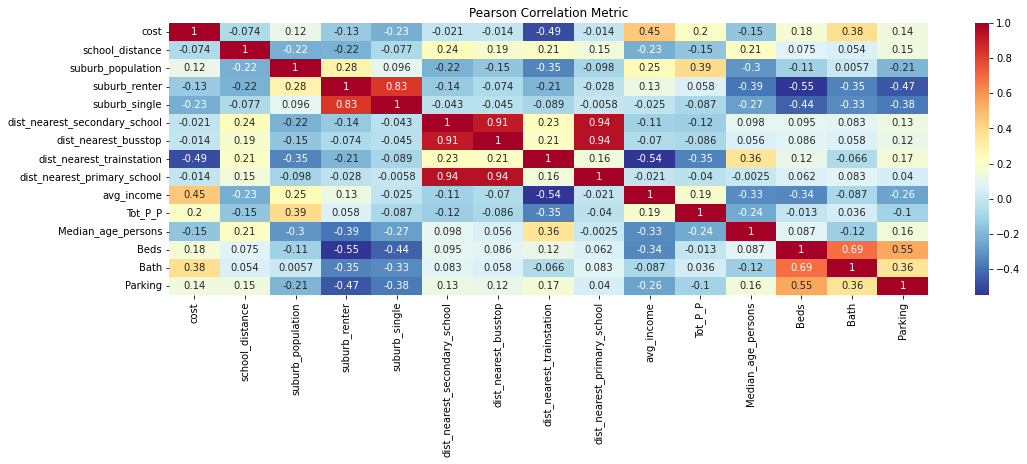

In [56]:
CORR_COLS = [
    'cost','school_distance','suburb_population','suburb_renter',
    'suburb_single','dist_nearest_secondary_school', 'dist_nearest_busstop',
    'dist_nearest_trainstation' , 'dist_nearest_primary_school',
    'avg_income','Tot_P_P','Median_age_persons','Beds','Bath','Parking'
]


fig,ax = plt.subplots(figsize=(17,5)) 
sns.heatmap(df_postcode[CORR_COLS].corr(), cmap = plt.cm.RdYlBu_r,annot=True, ax = ax)

plt.title('Pearson Correlation Metric')
#plt.savefig('../plots/corr.png')

Text(0.5, 1.0, 'Pearson Correlation Metric')

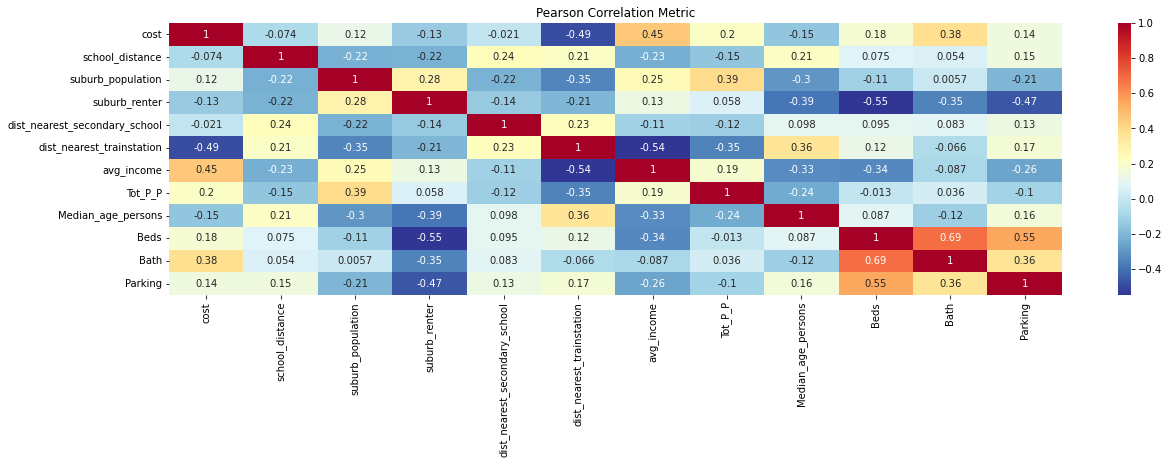

In [73]:
CORR_COLS = [
    'cost','school_distance','suburb_population','suburb_renter',
    'dist_nearest_secondary_school','dist_nearest_trainstation' , 
    'avg_income','Tot_P_P','Median_age_persons','Beds','Bath','Parking'
]


fig,ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df_postcode[CORR_COLS].corr(), cmap = plt.cm.RdYlBu_r,annot=True, ax = ax)

plt.title('Pearson Correlation Metric')
#plt.savefig('../plots/corr.png')

In [47]:
x = df_postcode[['cost','school_distance','suburb_population','suburb_renter',
                'suburb_single','dist_nearest_secondary_school',
                'avg_income','Tot_P_P','Median_age_persons']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled, columns= ['cost','school_distance','suburb_population','suburb_renter',
                                              'suburb_single','dist_nearest_secondary_school',
                                              'avg_income','Tot_P_P','Median_age_persons'] )

In [66]:
x = df_postcode[['cost','suburb_population','suburb_renter','suburb_family',
    'dist_nearest_secondary_school','dist_nearest_trainstation' , 
    'avg_income','Tot_P_P','Median_age_persons','Beds','Bath','Parking']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled, columns= ['cost','suburb_population','suburb_renter','suburb_family',
    'dist_nearest_secondary_school','dist_nearest_trainstation' , 
    'avg_income','Tot_P_P','Median_age_persons','Beds','Bath','Parking'] )

In [67]:
fit = ols(
    formula="cost ~ suburb_population + suburb_renter + suburb_family + dist_nearest_secondary_school + avg_income \
    + Tot_P_P + Median_age_persons + Beds + Bath + Parking",
    data=df1
).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     23.55
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.07e-32
Time:                        15:26:35   Log-Likelihood:                 202.38
No. Observations:                 317   AIC:                            -382.8
Df Residuals:                     306   BIC:                            -341.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [72]:
fit = ols(
    formula="cost ~ avg_income \
    + Tot_P_P + Median_age_persons + Bath + Parking",
    data=df1
).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     46.51
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           7.78e-36
Time:                        15:28:39   Log-Likelihood:                 201.11
No. Observations:                 318   AIC:                            -390.2
Df Residuals:                     312   BIC:                            -367.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0616      0